<a href="https://colab.research.google.com/github/biumahmud2012/Machine-Learning/blob/master/HealthCareCaseStudy_checkpoint_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health Care Case Study

## Part I - Identify the provider that overcharge for certain Procedures or Regions where Procedures are too expensive

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

C:\Users\mahmud\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
import scipy.stats as stats
import seaborn as sns
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
import pandas_profiling
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
from patsy import dmatrices

C:\Users\mahmud\Anaconda2\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as sm

In [ ]:
# center and scale the data
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load data
MedicareChargeInpatientSummary = pd.read_csv("Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011.csv")
MedicareChargeOutpatientSummary = pd.read_csv("Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011.csv")
MedicareProviderChargeInpatient = pd.read_csv("Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")
MedicareProviderChargeOutpatient = pd.read_csv("Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv")

Data Analysis and Data Preparation

In [ ]:
# View MedicareChargeInpatientSummary Table head Data
MedicareChargeInpatientSummary.head()

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,29228.55368,6902.381289,5514.435910
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,23924.98059,6809.799325,5791.920242
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,49186.95644,13614.616130,12415.825360
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,30371.27399,8037.269492,6858.689088
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,62346,23300.06199,5762.881821,4508.202659


In [ ]:
# View MedicareChargeOutpatientSummary Table head Data
MedicareChargeOutpatientSummary.head()

,APC,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,275987,74.202956,16.147079
1,0013 - Level II Debridement & Destruction,434706,196.170070,56.133853
2,0015 - Level III Debridement & Destruction,509576,326.503444,97.156250
3,0019 - Level I Excision/ Biopsy,27860,2013.181972,330.908369
4,0020 - Level II Excision/ Biopsy,40642,3161.457873,567.156154


In [ ]:
# View MedicareProviderChargeInpatient Table head Data
MedicareProviderChargeInpatient.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [ ]:
#Find null value in MedicareProviderChargeInpatient Table
MedicareProviderChargeInpatient.isnull().any()

DRG Definition                                False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Total Discharges                              False
Average Covered Charges                       False
Average Total Payments                        False
Average Medicare Payments                     False
dtype: bool

In [ ]:
# View MedicareProviderChargeOutpatient Table head Data
MedicareProviderChargeOutpatient.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


In [ ]:
#Find null value in MedicareProviderChargeOutpatient Table
MedicareProviderChargeOutpatient.isnull().any()

APC                                           False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Outpatient Services                           False
Average  Estimated Submitted Charges          False
Average Total Payments                        False
dtype: bool

### PART1A - Highest Cost Variation

In [ ]:
# Finding Standard deviation and mean for InpatientDRG
ProviderMedicare_IN = pd.concat(
[MedicareProviderChargeInpatient[['DRG Definition','Average Covered Charges']].groupby(['DRG Definition']).agg('std').add_suffix('_std'),
 MedicareProviderChargeInpatient[['DRG Definition','Average Covered Charges']].groupby(['DRG Definition']).agg('mean').add_suffix('_avg')]
 , axis =1)

In [ ]:
#Coefficient of Variance, the standard deviation divided by the mean
ProviderMedicare_IN['Variation'] = ProviderMedicare_IN.apply(lambda x: x['Average Covered Charges_std']/x['Average Covered Charges_avg'],axis =1)

In [ ]:
ProviderMedicare_IN['Variation'].nlargest(3)

DRG Definition
885 - PSYCHOSES                                                              0.717796
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC    0.633967
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                               0.613150
Name: Variation, dtype: float64

In [ ]:
# Finding Standard deviation and mean for OutpatientDRG
ProviderMedicare_OUT = pd.concat(
[MedicareProviderChargeOutpatient[["APC","Average  Estimated Submitted Charges"]].groupby(['APC']).agg('std').add_suffix('_std'),
MedicareProviderChargeOutpatient[["APC","Average  Estimated Submitted Charges"]].groupby(['APC']).agg('mean').add_suffix('_avg')],
axis =1)

In [ ]:
#Coefficient of Variance, the standard deviation divided by the mean
ProviderMedicare_OUT['Variation'] = ProviderMedicare_OUT.apply(lambda x: x['Average  Estimated Submitted Charges_std']/x['Average  Estimated Submitted Charges_avg'],axis =1)

In [ ]:
ProviderMedicare_OUT['Variation'].nlargest(3)

APC
0604 - Level 1 Hospital Clinic Visits     1.385150
0698 - Level II Eye Tests & Treatments    1.310444
0019 - Level I Excision/ Biopsy           1.229897
Name: Variation, dtype: float64

### Part 1B - Hight Cost Claimed by Provider

##### For In Patient

In [ ]:
#Finding the max of Average Covered Charges for InpatientDRG
ProviderMedicare_IN2 = pd.DataFrame(MedicareProviderChargeInpatient[['DRG Definition', 'Average Covered Charges']].groupby(['DRG Definition']).agg('max').add_suffix('_max'))

In [ ]:
ProviderMedicare_IN2 = ProviderMedicare_IN2.reset_index()

In [ ]:
#Merging the max value with InpatientDRG dataset
MedicareProviderInMerge = MedicareProviderChargeInpatient.merge(ProviderMedicare_IN2,on='DRG Definition', how='left')

In [ ]:
MedicareProviderInMerge.to_csv('MedicareProviderINMERGE.csv')

In [ ]:
#function to get the max indicator
def difftype(MedicareProviderInMerge):
    if ((MedicareProviderInMerge['Average Covered Charges_max']  == MedicareProviderInMerge['Average Covered Charges'])):
        return 1
    else:
        return 0

In [ ]:
MedicareProviderInMerge['MAX'] = MedicareProviderInMerge.apply(difftype, axis=1)

In [ ]:
#getting number of times a provider has charge max value for procedure
MedicareInMaxCalProvider= pd.DataFrame(MedicareProviderInMerge[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum'),)

In [ ]:
#getting number of times a region has charge max value for procedure
MedicareInMaxCalRegion= pd.DataFrame(MedicareProviderInMerge[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_sum'),)

In [ ]:
MedicareInMaxCalProvider['MAX_sum'].nlargest(3)

Provider Name
BAYONNE HOSPITAL CENTER          23
CROZER CHESTER MEDICAL CENTER    11
STANFORD HOSPITAL                10
Name: MAX_sum, dtype: int64

In [ ]:
MedicareInMaxCalRegion['MAX_sum'].nlargest(5)

Hospital Referral Region (HRR) Description
NJ - Newark                 25
PA - Philadelphia           23
CA - San Mateo County       13
CA - Contra Costa County     6
CA - Alameda County          5
Name: MAX_sum, dtype: int64

##### For Out Patient 

In [ ]:
#Finding the max of Average Covered Charges for OutPatientAPC
MedicareProvider_OUT2 = pd.DataFrame(MedicareProviderChargeOutpatient[['APC', 'Average  Estimated Submitted Charges']].groupby(['APC']).agg('max').add_suffix('_max'))

In [ ]:
MedicareProvider_OUT2 = MedicareProvider_OUT2.reset_index()

In [ ]:

#Merging the max value with InpatientDRG dataset
MedicareProviderOutMarge = MedicareProviderChargeOutpatient.merge(MedicareProvider_OUT2,on='APC', how='left')

In [ ]:
#function to get the max indicator
def difftype2(MedicareProviderOutMarge):
    if ((MedicareProviderOutMarge['Average  Estimated Submitted Charges_max']  == MedicareProviderOutMarge['Average  Estimated Submitted Charges'])):
        return 1
    else:
        return 0

In [ ]:

MedicareProviderOutMarge['MAX'] = MedicareProviderOutMarge.apply(difftype2, axis=1)

In [ ]:
#getting number of times a provider has charge max value for procedure
MedicareOutMaxCalcProvider= pd.DataFrame(MedicareProviderOutMarge[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum'),)

In [ ]:
#getting number of times a region has charge max value for procedure
MedicareOutMaxCalcRegion= pd.DataFrame(MedicareProviderOutMarge[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_sum'),)

In [ ]:

MedicareOutMaxCalcProvider['MAX_sum'].nlargest(5)

Provider Name
CAPITAL HEALTH MEDICAL CENTER - HOPEWELL    2
COLUMBIA HOSPITAL                           2
FORT WALTON BEACH MEDICAL CENTER            2
BEVERLY HOSPITAL CORPORATION                1
CENTINELA HOSPITAL MEDICAL CENTER           1
Name: MAX_sum, dtype: int64

In [ ]:
MedicareOutMaxCalcRegion['MAX_sum'].nlargest(3)

Hospital Referral Region (HRR) Description
PA - Philadelphia     5
CA - Los Angeles      3
CA - Orange County    2
Name: MAX_sum, dtype: int64

### Part 1C - Hight Cost Claimed by Region

##### FOR In Patient DRG

In [ ]:
#Finding the mean of Average Covered Charges for In patientDRG by DRG Defination and Region
MedicareProvider_Inp_AGG = pd.DataFrame(MedicareProviderChargeInpatient[['DRG Definition', 'Hospital Referral Region (HRR) Description',  'Average Covered Charges']].groupby(['DRG Definition', 'Hospital Referral Region (HRR) Description']).agg('mean').add_suffix('_avg'))

In [ ]:
MedicareProvider_Inp_AGG  = MedicareProvider_Inp_AGG.reset_index()

In [ ]:
MedicareProvider_Inp_AGG.head()

,DRG Definition,Hospital Referral Region (HRR) Description,Average Covered Charges_avg
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK - Anchorage,34805.130430
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,40237.361538
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,36285.182905
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Huntsville,18878.955554
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Mobile,22802.270118


In [ ]:
#Finding the max for InpatientDRG DRG Definition
MedicareProviderInMax = pd.DataFrame(MedicareProvider_Inp_AGG[['DRG Definition', 'Average Covered Charges_avg']].groupby(['DRG Definition']).agg('max').add_suffix('_max'))

In [ ]:
MedicareProviderInMax = MedicareProviderInMax.reset_index()

In [ ]:
MedicareProviderInMax.head()

,DRG Definition,Average Covered Charges_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,105929.470600
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,148128.437500
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,145720.057518
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,73820.938782
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,65418.983067


In [ ]:
#Merging The mean and max - will give side by side comparison of region having highest claims
MedicareProviderInMarge = MedicareProvider_Inp_AGG.merge(MedicareProviderInMax,on='DRG Definition', how='left')

In [ ]:
MedicareProviderInMarge.head()

,DRG Definition,Hospital Referral Region (HRR) Description,Average Covered Charges_avg,Average Covered Charges_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK - Anchorage,34805.130430,105929.4706
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,40237.361538,105929.4706
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,36285.182905,105929.4706
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Huntsville,18878.955554,105929.4706
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Mobile,22802.270118,105929.4706


In [ ]:

#function to get the max indicator
def difftype3(MedicareProviderInMarge):
    if ((MedicareProviderInMarge['Average Covered Charges_avg'] == MedicareProviderInMarge['Average Covered Charges_avg_max'])):
        return 1
    elif ((MedicareProviderInMarge['Average Covered Charges_avg'] > MedicareProviderInMarge['Average Covered Charges_avg_max'])):
        return 1
    else:
        return 0

In [ ]:
MedicareProviderInMarge['MAX'] = MedicareProviderInMarge.apply(difftype3, axis=1)

In [ ]:
MedicareProviderInMarge[MedicareProviderInMarge['MAX'] == 1].head()

,DRG Definition,Hospital Referral Region (HRR) Description,Average Covered Charges_avg,Average Covered Charges_avg_max,MAX
22,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA - Napa,105929.470600,105929.470600,1
330,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,CA - San Mateo County,148128.437500,148128.437500,1
588,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - Contra Costa County,145720.057518,145720.057518,1
907,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - San Mateo County,73820.938782,73820.938782,1
1198,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - Contra Costa County,65418.983067,65418.983067,1


In [ ]:
#getting number of times a region has charge max value for procedure
Medicare_Provider_IN_MERGE_GROUPED = pd.DataFrame(MedicareProviderInMarge[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_sum'),)

In [ ]:
Medicare_Provider_IN_MERGE_GROUPED = Medicare_Provider_IN_MERGE_GROUPED.reset_index()

In [ ]:
Medicare_Provider_IN_MERGE_GROUPED.head()


,Hospital Referral Region (HRR) Description,MAX_sum
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,0
3,AL - Huntsville,0
4,AL - Mobile,0


##### FOR Out Patient DRG

In [ ]:
#Finding the mean of Average Covered Charges for Outpatient by APC and Region
Medicare_Provider_Out_AGG = pd.DataFrame(MedicareProviderChargeOutpatient[['APC', 'Hospital Referral Region (HRR) Description', 'Average  Estimated Submitted Charges']].groupby(['APC', 'Hospital Referral Region (HRR) Description']).agg('mean').add_suffix('_avg'))

In [ ]:
Medicare_Provider_Out_AGG = Medicare_Provider_Out_AGG.reset_index()

In [ ]:
Medicare_Provider_Out_AGG.head()

,APC,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges_avg
0,0012 - Level I Debridement & Destruction,AK - Anchorage,149.589749
1,0012 - Level I Debridement & Destruction,AL - Birmingham,78.086957
2,0012 - Level I Debridement & Destruction,AR - Fort Smith,80.102439
3,0012 - Level I Debridement & Destruction,AR - Jonesboro,16.993333
4,0012 - Level I Debridement & Destruction,AR - Little Rock,96.968863


In [ ]:
#Finding the max for Outpatient
Medicare_Provider_Out_MAX = pd.DataFrame(Medicare_Provider_Out_AGG[['APC', 'Average  Estimated Submitted Charges_avg']].groupby(['APC']).agg('max').add_suffix('_max'))

In [ ]:
Medicare_Provider_Out_MAX = Medicare_Provider_Out_MAX.reset_index()

In [ ]:
Medicare_Provider_Out_MAX.head()

,APC,Average Estimated Submitted Charges_avg_max
0,0012 - Level I Debridement & Destruction,438.307045
1,0013 - Level II Debridement & Destruction,1042.707451
2,0015 - Level III Debridement & Destruction,1478.536545
3,0019 - Level I Excision/ Biopsy,15946.325655
4,0020 - Level II Excision/ Biopsy,15784.975000


In [ ]:
#Merging The mean and max - will give side by side comparison of region having highest claims
Medicare_Provider_Out_MERGE = Medicare_Provider_Out_AGG.merge(Medicare_Provider_Out_MAX,on='APC', how='left')

In [ ]:
#function to get the max indicator
def difftype(Medicare_Provider_Out_MERGE):
    if ((Medicare_Provider_Out_MERGE['Average  Estimated Submitted Charges_avg'] == Medicare_Provider_Out_MERGE['Average  Estimated Submitted Charges_avg_max'])):
        return 1
    elif ((Medicare_Provider_Out_MERGE['Average  Estimated Submitted Charges_avg'] > Medicare_Provider_Out_MERGE['Average  Estimated Submitted Charges_avg_max'])):
        return 1
    else:
        return 0

In [ ]:
Medicare_Provider_Out_MERGE['MAX'] = Medicare_Provider_Out_MERGE.apply(difftype, axis=1)

In [ ]:
Medicare_Provider_Out_MERGE[Medicare_Provider_Out_MERGE['MAX'] == 1].head()

,APC,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges_avg,Average Estimated Submitted Charges_avg_max,MAX
93,0012 - Level I Debridement & Destruction,NE - Omaha,438.307045,438.307045,1
160,0013 - Level II Debridement & Destruction,AL - Dothan,1042.707451,1042.707451,1
582,0015 - Level III Debridement & Destruction,MI - Dearborn,1478.536545,1478.536545,1
756,0019 - Level I Excision/ Biopsy,CA - Los Angeles,15946.325655,15946.325655,1
1013,0020 - Level II Excision/ Biopsy,IL - Aurora,15784.975000,15784.975000,1


In [ ]:
#getting number of times a region has charge max value for procedure
Medicare_Provider_Out_MERGE_GROUPED = pd.DataFrame(Medicare_Provider_Out_MERGE[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_sum'),)

In [ ]:
Medicare_Provider_Out_MERGE_GROUPED = Medicare_Provider_Out_MERGE_GROUPED.reset_index()

In [ ]:
Medicare_Provider_Out_MERGE_GROUPED.head()

,Hospital Referral Region (HRR) Description,MAX_sum
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,1
3,AL - Huntsville,1
4,AL - Mobile,0


In [ ]:
frames = [Medicare_Provider_IN_MERGE_GROUPED, Medicare_Provider_Out_MERGE_GROUPED]
Medicare_Provider_data_REGION = pd.concat(frames)

In [ ]:
Medicare_Provider_data_REGION.head()

,Hospital Referral Region (HRR) Description,MAX_sum
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,0
3,AL - Huntsville,0
4,AL - Mobile,0


In [ ]:
#getting the total sum of occurance
Medicare_provider_data_REGION_GROUPED = pd.DataFrame(Medicare_Provider_data_REGION[['Hospital Referral Region (HRR) Description','MAX_sum']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_agg'),)

In [ ]:
Medicare_provider_data_REGION_GROUPED['MAX_sum_agg'].nlargest(3)

Hospital Referral Region (HRR) Description
CA - Contra Costa County    36
CA - San Mateo County       24
CA - Santa Cruz             11
Name: MAX_sum_agg, dtype: int64

### Part 1D: Hieght Number Procedure and Largest Different between Claim and Reimbursement

##### Inpatient Analysis

In [ ]:
Medicare_Patient_InP_DRG = MedicareProviderChargeInpatient[['DRG Definition', 'Provider Name','Average Total Payments', 'Average Covered Charges' ]]

In [ ]:
#Difference of claim and reimbursement
Medicare_Patient_InP_DRG['CLAIM_DIFF'] = Medicare_Patient_InP_DRG.apply(lambda x: x['Average Covered Charges'] - x['Average Total Payments'],axis =1)

C:\Users\mahmud\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
Medicare_Patient_InP_DRG.head()

,DRG Definition,Provider Name,Average Total Payments,Average Covered Charges,CLAIM_DIFF
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,5777.241758,32963.07692,27185.835162
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,5787.571429,15131.85714,9344.285711
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,5434.958333,37560.37500,32125.416667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,5417.560000,13998.28000,8580.720000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,5658.333333,31633.27778,25974.944447


In [ ]:
#Finding the mean of Average Covered Charges for InpatientDRG by DRG Defination and Provider
Medicare_Provider_InP_AGG = pd.DataFrame(Medicare_Patient_InP_DRG[['DRG Definition', 'Provider Name', 'CLAIM_DIFF']].groupby(['DRG Definition', 'Provider Name']).agg('mean').add_suffix('_avg'))

In [ ]:
Medicare_Provider_InP_AGG = Medicare_Provider_InP_AGG.reset_index()

In [ ]:
Medicare_Provider_InP_AGG.head()

,DRG Definition,Provider Name,CLAIM_DIFF_avg
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABINGTON MEMORIAL HOSPITAL,33207.235299
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADENA REGIONAL MEDICAL CENTER,16247.499998
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADVENTIST LA GRANGE MEMORIAL HOSPITAL,30415.357141


In [ ]:
#Finding the max for InpatientDRG DRG Definition
Medicare_Provider_InP_MAX = pd.DataFrame(Medicare_Provider_InP_AGG[['DRG Definition', 'CLAIM_DIFF_avg']].groupby(['DRG Definition']).agg('max').add_suffix('_max'))

In [ ]:
Medicare_Provider_InP_MAX = Medicare_Provider_InP_MAX.reset_index()

In [ ]:
Medicare_Provider_InP_MAX.head()

,DRG Definition,CLAIM_DIFF_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,135377.61538
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,122609.00000
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,214346.92103
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,144842.08333
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,109535.14290


In [ ]:
#Merging The mean and max - will give side by side comparison of region having highest claim difference
Medicare_Provider_IN_MERGE = Medicare_Provider_InP_AGG.merge(Medicare_Provider_InP_MAX,on='DRG Definition', how='left')

In [ ]:
Medicare_Provider_IN_MERGE = Medicare_Provider_IN_MERGE.reset_index()

In [ ]:
Medicare_Provider_IN_MERGE.head()

,index,DRG Definition,Provider Name,CLAIM_DIFF_avg,CLAIM_DIFF_avg_max
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671,135377.61538
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146,135377.61538
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABINGTON MEMORIAL HOSPITAL,33207.235299,135377.61538
3,3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADENA REGIONAL MEDICAL CENTER,16247.499998,135377.61538
4,4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADVENTIST LA GRANGE MEMORIAL HOSPITAL,30415.357141,135377.61538


In [ ]:
#function to get the max indicator
def difftype(Medicare_Provider_IN_MERGE):
    if ((Medicare_Provider_IN_MERGE['CLAIM_DIFF_avg'] == Medicare_Provider_IN_MERGE['CLAIM_DIFF_avg_max'])):
        return 1
    elif ((Medicare_Provider_IN_MERGE['CLAIM_DIFF_avg'] > Medicare_Provider_IN_MERGE['CLAIM_DIFF_avg_max'])):
        return 1
    else:
        return 0

In [ ]:
Medicare_Provider_IN_MERGE['MAX'] = Medicare_Provider_IN_MERGE.apply(difftype, axis=1)

In [ ]:
Medicare_Provider_IN_MERGE[Medicare_Provider_IN_MERGE['MAX'] == 1].head()

,index,DRG Definition,Provider Name,CLAIM_DIFF_avg,CLAIM_DIFF_avg_max,MAX
980,980,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER,135377.61538,135377.61538,1
2048,2048,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,STANFORD HOSPITAL,122609.00000,122609.00000,1
2533,2533,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,DOCTORS MEDICAL CENTER,214346.92103,214346.92103,1
3953,3953,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,BAYONNE HOSPITAL CENTER,144842.08333,144842.08333,1
6514,6514,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,HAHNEMANN UNIVERSITY HOSPITAL,109535.14290,109535.14290,1


In [ ]:
#getting number of times a provider has max claim diff for max procudures
Medicare_Provider_IN_MERGE_GROUPED = pd.DataFrame(Medicare_Provider_IN_MERGE[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum'),)

In [ ]:
Medicare_Provider_IN_MERGE_GROUPED['MAX_sum'].nlargest(3)

Provider Name
BAYONNE HOSPITAL CENTER          29
CROZER CHESTER MEDICAL CENTER    12
HAHNEMANN UNIVERSITY HOSPITAL     8
Name: MAX_sum, dtype: int64

##### Out Patient Analysis

In [ ]:
Medicare_Provider_Out_P_DRG = MedicareProviderChargeOutpatient[['APC', 'Provider Name', 'Average  Estimated Submitted Charges', 'Average Total Payments' ]]

In [ ]:
#Difference of claim and reimbursement
Medicare_Provider_Out_P_DRG['CLAIM_DIFF'] = Medicare_Provider_Out_P_DRG.apply(lambda x: x['Average  Estimated Submitted Charges'] - x['Average Total Payments'],axis =1)

C:\Users\mahmud\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
Medicare_Provider_Out_P_DRG.head()

,APC,Provider Name,Average Estimated Submitted Charges,Average Total Payments,CLAIM_DIFF
0,0012 - Level I Debridement & Destruction,EAST ALABAMA MEDICAL CENTER AND SNF,78.086957,21.910435,56.176522
1,0012 - Level I Debridement & Destruction,CENTRAL PENINSULA GENERAL HOSPITAL,149.589749,36.623853,112.965895
2,0012 - Level I Debridement & Destruction,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",50.135411,14.541841,35.593569
3,0012 - Level I Debridement & Destruction,BANNER BAYWOOD MEDICAL CENTER,112.400000,23.736000,88.664000
4,0012 - Level I Debridement & Destruction,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",152.045455,16.569091,135.476364


In [ ]:
Medicare_Provider_Out_P_AGG = pd.DataFrame(Medicare_Provider_Out_P_DRG[['APC', 'Provider Name', 'CLAIM_DIFF']].groupby(['APC', 'Provider Name']).agg('mean').add_suffix('_avg'))

In [ ]:
Medicare_Provider_Out_P_AGG = Medicare_Provider_Out_P_AGG.reset_index()

In [ ]:
Medicare_Provider_Out_P_AGG.head()

,APC,Provider Name,CLAIM_DIFF_avg
0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818
1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495
2,0012 - Level I Debridement & Destruction,ARNOT OGDEN MEDICAL CENTER,98.893846
3,0012 - Level I Debridement & Destruction,"AROOSTOOK MEDICAL CENTER,THE",16.975013
4,0012 - Level I Debridement & Destruction,AVERA MCKENNAN HOSPITAL & UNIVERSITY HEALTH CE...,22.306715


In [ ]:
#Finding the max for InpatientDRG DRG Definition
Medicare_Provider_Out_P_MAX = pd.DataFrame(Medicare_Provider_Out_P_AGG[['APC', 'CLAIM_DIFF_avg']].groupby(['APC']).agg('max').add_suffix('_max'))

In [ ]:
Medicare_Provider_Out_P_MAX = Medicare_Provider_Out_P_MAX.reset_index()

In [ ]:
Medicare_Provider_Out_P_MAX.head()

,APC,CLAIM_DIFF_avg_max
0,0012 - Level I Debridement & Destruction,827.44000
1,0013 - Level II Debridement & Destruction,5175.40000
2,0015 - Level III Debridement & Destruction,2980.73963
3,0019 - Level I Excision/ Biopsy,26073.80500
4,0020 - Level II Excision/ Biopsy,18362.75882


In [ ]:
#Merging The mean and max - will give side by side comparison of region having highest claim difference
Medicare_Provider_Out_P_MERGE = Medicare_Provider_Out_P_AGG.merge(Medicare_Provider_Out_P_MAX,on='APC', how='left')

In [ ]:
Medicare_Provider_Out_P_MERGE = Medicare_Provider_Out_P_MERGE.reset_index()

In [ ]:
Medicare_Provider_Out_P_MERGE.head()

,index,APC,Provider Name,CLAIM_DIFF_avg,CLAIM_DIFF_avg_max
0,0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818,827.44
1,1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495,827.44
2,2,0012 - Level I Debridement & Destruction,ARNOT OGDEN MEDICAL CENTER,98.893846,827.44
3,3,0012 - Level I Debridement & Destruction,"AROOSTOOK MEDICAL CENTER,THE",16.975013,827.44
4,4,0012 - Level I Debridement & Destruction,AVERA MCKENNAN HOSPITAL & UNIVERSITY HEALTH CE...,22.306715,827.44


In [ ]:
#function to get the max indicator
def difftyp(Medicare_Provider_Out_P_MERGE):
    if ((Medicare_Provider_Out_P_MERGE['CLAIM_DIFF_avg'] == Medicare_Provider_Out_P_MERGE['CLAIM_DIFF_avg_max'])):
        return 1
    elif ((Medicare_Provider_Out_P_MERGE['CLAIM_DIFF_avg'] > Medicare_Provider_Out_P_MERGE['CLAIM_DIFF_avg_max'])):
        return 1
    else:
        return 0

In [ ]:
Medicare_Provider_Out_P_MERGE['MAX'] = Medicare_Provider_Out_P_MERGE.apply(difftyp, axis=1)

In [ ]:
Medicare_Provider_Out_P_MERGE[Medicare_Provider_Out_P_MERGE['MAX'] == 1].head()

,index,APC,Provider Name,CLAIM_DIFF_avg,CLAIM_DIFF_avg_max,MAX
152,152,0012 - Level I Debridement & Destruction,NEBRASKA ORTHOPAEDIC HOSPITAL,827.44000,827.44000,1
1265,1265,0013 - Level II Debridement & Destruction,RUSSELLVILLE HOSPITAL,5175.40000,5175.40000,1
2703,2703,0015 - Level III Debridement & Destruction,RESEARCH MEDICAL CENTER,2980.73963,2980.73963,1
3247,3247,0019 - Level I Excision/ Biopsy,CENTINELA HOSPITAL MEDICAL CENTER,26073.80500,26073.80500,1
4255,4255,0020 - Level II Excision/ Biopsy,ORANGE COAST MEMORIAL MEDICAL CENTER,18362.75882,18362.75882,1


In [ ]:
#getting number of times a provider has max claim diff for max procudures
Medicare_Provider_Out_P_MERGE_GROUPED = pd.DataFrame(Medicare_Provider_Out_P_MERGE[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum'))

In [ ]:
Medicare_Provider_Out_P_MERGE_GROUPED = Medicare_Provider_Out_P_MERGE_GROUPED.reset_index()

In [ ]:
Medicare_Provider_Out_P_MERGE_GROUPED.head()

,Provider Name,MAX_sum
0,ABBEVILLE GENERAL HOSPITAL,0
1,ABBOTT NORTHWESTERN HOSPITAL,0
2,ABILENE REGIONAL MEDICAL CENTER,0
3,ABINGTON MEMORIAL HOSPITAL,0
4,ACMH HOSPITAL,0


In [ ]:
Medicare_Provider_Out_P_MERGE_GROUPED['MAX_sum'].nlargest(3)

327    2
484    2
799    2
Name: MAX_sum, dtype: int64

%%%%%%%%%%%%%%%%%%%%%%%%%%%%END THE PART ONE%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Part 2: Least Similar Others by Provider and Region

### Part 2A: Least Similar Others by Provider 

In [ ]:
MedicareProviderChargeInpatient = pd.read_csv("Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")
MedicareProviderChargeOutpatient = pd.read_csv("Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv")

##### Date Preparation

In [ ]:
MedicareProviderChargeInpatient.isnull().any()

DRG Definition                                False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Total Discharges                              False
Average Covered Charges                       False
Average Total Payments                        False
Average Medicare Payments                     False
dtype: bool

In [ ]:
MedicareProviderChargeOutpatient.isnull().any()

APC                                           False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Outpatient Services                           False
Average  Estimated Submitted Charges          False
Average Total Payments                        False
dtype: bool

In [ ]:
Medicare_Provider_IN_P_DRG = MedicareProviderChargeInpatient[['DRG Definition', 'Provider Name','Average Total Payments', 'Average Covered Charges' ]]

In [ ]:
pandas_profiling.ProfileReport(MedicareProviderChargeInpatient)

Number of variables,12
Number of observations,163065
Total Missing (%),0.0%
Total size in memory,14.9 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [ ]:
pandas_profiling.ProfileReport(MedicareProviderChargeOutpatient)

Number of variables,11
Number of observations,43372
Total Missing (%),0.0%
Total size in memory,3.6 MiB
Average record size in memory,88.0 B
Numeric,5
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


##### Data Manipulation

In [ ]:
Medicare_Provider_In_P_data = MedicareProviderChargeInpatient[['DRG Definition', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
                                              'Total Discharges', 'Average Covered Charges', 'Average Total Payments' ]]

In [ ]:
Medicare_Provider_In_P_data.rename(columns={'DRG Definition' : 'Procedures', 'Hospital Referral Region (HRR) Description' : 'Region',
                                 'Total Discharges' : 'Count Of Services', 'Average Covered Charges' : 'Charges',
                                 'Average Total Payments' : 'Payment'}, inplace = True)

C:\Users\mahmud\Anaconda2\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [ ]:
Medicare_Provider_Out_P_data = MedicareProviderChargeOutpatient[['APC', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
                                                 'Outpatient Services', 'Average  Estimated Submitted Charges', 'Average Total Payments' ]]

In [ ]:
Medicare_Provider_Out_P_data.rename(columns={'APC' : 'Procedures', 'Hospital Referral Region (HRR) Description' : 'Region',
                                 'Outpatient Services' : 'Count Of Services', 'Average  Estimated Submitted Charges' : 'Charges',
                                 'Average Total Payments' : 'Payment'}, inplace = True)

In [ ]:
frames = [Medicare_Provider_In_P_data, Medicare_Provider_Out_P_data]
Medicare_Provider_data = pd.concat(frames)

In [ ]:
Medicare_Provider_data.head()

,Procedures,Provider Name,Provider State,Region,Count Of Services,Charges,Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,91,32963.07692,5777.241758
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,14,15131.85714,5787.571429
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,AL,AL - Birmingham,24,37560.37500,5434.958333
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,AL,AL - Birmingham,25,13998.28000,5417.560000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,AL,AL - Birmingham,18,31633.27778,5658.333333


In [ ]:
Medicare_Provider_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 7 columns):
Procedures           206437 non-null object
Provider Name        206437 non-null object
Provider State       206437 non-null object
Region               206437 non-null object
Count Of Services    206437 non-null int64
Charges              206437 non-null float64
Payment              206437 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 12.6+ MB


In [ ]:
Medicare_Provider_data.isnull().any()

Procedures           False
Provider Name        False
Provider State       False
Region               False
Count Of Services    False
Charges              False
Payment              False
dtype: bool

In [ ]:
Medicare_Provider_data['Charges'] = Medicare_Provider_data['Charges'].round(2)

In [ ]:
Medicare_Provider_data['Payment'] = Medicare_Provider_data['Payment'].round(2)

In [ ]:
Medicare_Provider_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 7 columns):
Procedures           206437 non-null object
Provider Name        206437 non-null object
Provider State       206437 non-null object
Region               206437 non-null object
Count Of Services    206437 non-null int64
Charges              206437 non-null float64
Payment              206437 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 12.6+ MB


#### Grouping data by Provider and Region

##### By Provider

In [ ]:
Medicare_data_group_provider = Medicare_Provider_data.groupby(['Provider Name']).agg({'Procedures' :  'nunique',
  'Provider State' : 'nunique',  'Region': 'nunique', 'Count Of Services': 'sum' ,  'Charges': 'sum' , 'Payment' : 'sum'})

In [ ]:
Medicare_data_group_provider = Medicare_data_group_provider.reset_index()

In [ ]:
Medicare_data_group_provider.head()

,Provider Name,Count Of Services,Provider State,Charges,Region,Procedures,Payment
0,ABBEVILLE GENERAL HOSPITAL,1294,1,314058.89,1,25,121115.80
1,ABBOTT NORTHWESTERN HOSPITAL,20810,1,4495571.85,1,121,1065438.89
2,ABILENE REGIONAL MEDICAL CENTER,7285,1,3613719.38,1,71,516580.33
3,ABINGTON MEMORIAL HOSPITAL,19300,1,6832266.25,1,121,1027582.36
4,ACMH HOSPITAL,4151,1,406719.05,1,54,199332.50


##### By Region

In [ ]:
Medicare_Provider_data_group_region = Medicare_Provider_data.groupby(['Region']).agg({'Procedures' :  'nunique',
 'Provider State' : 'nunique',  'Provider Name': 'nunique','Count Of Services': 'sum' ,  'Charges': 'sum' ,  'Payment' : 'sum'})

In [ ]:
Medicare_Provider_data_group_region = Medicare_Provider_data_group_region.reset_index()

In [ ]:
Medicare_Provider_data_group_region.head()

,Region,Count Of Services,Provider State,Charges,Provider Name,Procedures,Payment
0,AK - Anchorage,31406,1,9427445.52,9,100,3390445.95
1,AL - Birmingham,166237,2,68364063.11,40,127,14648212.20
2,AL - Dothan,43700,3,9561883.16,10,122,2419670.08
3,AL - Huntsville,71691,2,11754072.47,8,125,3090569.68
4,AL - Mobile,70394,2,16193817.95,14,125,4256181.67


Creating data for fitting into cluster analysis

In [ ]:
Medicare_data_group_provider_num = Medicare_data_group_provider.select_dtypes(include =['int64', 'float64']).copy()

In [ ]:
col_list_prov = Medicare_data_group_provider_num.columns

#### Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
Medicare_provider_scaled=sc.fit_transform(Medicare_data_group_provider_num)

Applying PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
var_ratio={}
pc = PCA(n_components=3)
Medicare_provider_pca=pc.fit(Medicare_provider_scaled)
var_ratio[5]=sum(Medicare_provider_pca.explained_variance_ratio_)

In [ ]:
reduced_cr=pc.fit_transform(Medicare_provider_scaled)

In [ ]:
var_ratio

{5: 0.94596279501992098}

In [ ]:
reduced_cr.shape

(3201L, 3L)

In [ ]:
Medicare_provider_scaled.shape

(3201L, 6L)

In [ ]:
pd.DataFrame(pc.components_.T, columns=['PC_' + str(i) for i in range(3)], index=col_list_prov)

,PC_0,PC_1,PC_2
Count Of Services,0.289998,-0.288352,0.896801
Provider State,0.356879,0.591702,0.086489
Charges,0.464627,-0.172105,-0.354212
Region,0.361007,0.589502,0.074693
Procedures,0.428081,-0.397857,-0.197239
Payment,0.509000,-0.176972,-0.135345


In [ ]:
pd.Series(pc.explained_variance_ratio_,index=['PC_' + str(i) for i in range(3)])

PC_0    0.564617
PC_1    0.261370
PC_2    0.119976
dtype: float64

##### Clustering


Silhouette Coefficien

In [ ]:
from sklearn import metrics
#metrics.silhouette_score(credit_scaled, km_4.labels_)

In [ ]:
# calculate SC for K=3 through K=12
k_range = range(3, 25)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(Medicare_provider_scaled)
    scores.append(metrics.silhouette_score(Medicare_provider_scaled, km.labels_))

In [ ]:
scores

[0.52013812264260406,
 0.53558982542917055,
 0.55160562280718961,
 0.45082940343251965,
 0.42797340558229646,
 0.43037379132062831,
 0.43126825936678764,
 0.3970413810656433,
 0.39479686309057327,
 0.39811603295080789,
 0.39954939316357474,
 0.36418744250607787,
 0.36201466759422157,
 0.354977869135085,
 0.35380264307114517,
 0.35471826718683808,
 0.3423794732353157,
 0.33330010173992253,
 0.34624253597643334,
 0.32547032479801724,
 0.33151708272118985,
 0.33365235963459478]

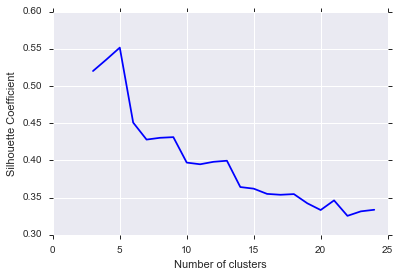

In [ ]:
# plot the results
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km_22=KMeans(n_clusters=22,random_state=123)

In [ ]:
km_22.fit(reduced_cr)
km_22.labels_

array([ 7, 16,  1, ..., 20, 18, 20])

In [ ]:
pd.Series(km_22.labels_).value_counts()

7     554
20    517
0     437
14    377
1     361
18    328
16    200
4     146
10     93
15     38
5      31
12     29
9      22
11     22
3      13
13     12
6       6
2       5
21      4
17      3
8       2
19      1
dtype: int64

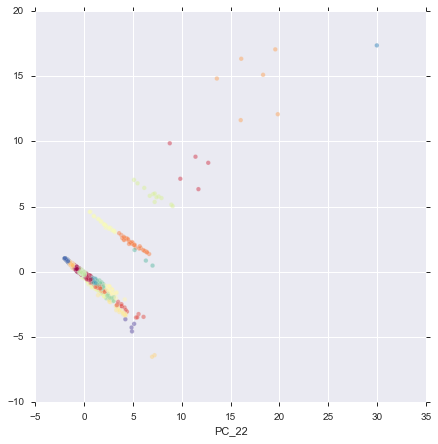

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_22.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_22')

In [ ]:
cluster_df_22=pd.concat([Medicare_data_group_provider, pd.Series(km_22.labels_, name='Cluster_22')], axis=1)

In [ ]:
cluster_df_22.to_csv('cluster_df_22_2.csv')

In [ ]:
Medicare_Provider_data_group_region.head()

,Region,Count Of Services,Provider State,Charges,Provider Name,Procedures,Payment
0,AK - Anchorage,31406,1,9427445.52,9,100,3390445.95
1,AL - Birmingham,166237,2,68364063.11,40,127,14648212.20
2,AL - Dothan,43700,3,9561883.16,10,122,2419670.08
3,AL - Huntsville,71691,2,11754072.47,8,125,3090569.68
4,AL - Mobile,70394,2,16193817.95,14,125,4256181.67


In [ ]:

Medicare_data_group_region_num = Medicare_Provider_data_group_region.select_dtypes(include =['int64', 'float64']).copy()

In [ ]:
col_list_reg = Medicare_data_group_region_num.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Medicare_region_scaled=sc.fit_transform(Medicare_data_group_region_num)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
var_ratio={}
pc = PCA(n_components=4)
Medicare_region_pca=pc.fit(Medicare_region_scaled)
var_ratio[4]=sum(Medicare_region_pca.explained_variance_ratio_)

In [ ]:
reduced_cr_1=pc.fit_transform(Medicare_region_scaled)

In [ ]:
var_ratio

{4: 0.96655190443278161}

In [ ]:
reduced_cr_1.shape

(306L, 4L)

In [ ]:
Medicare_region_scaled.shape

(306L, 6L)

In [ ]:
pd.DataFrame(pc.components_.T, columns=['PC_' + str(i) for i in range(4)], index=col_list_reg)

,PC_0,PC_1,PC_2,PC_3
Count Of Services,0.424189,-0.090060,-0.149066,0.852557
Provider State,0.117119,0.919499,0.334287,0.079286
Charges,0.467551,-0.192563,0.227669,-0.410366
Provider Name,0.486000,0.004980,0.219587,-0.151846
Procedures,0.317197,0.294480,-0.859202,-0.271965
Payment,0.500932,-0.150287,0.166591,-0.037931


In [ ]:
pd.Series(pc.explained_variance_ratio_,index=['PC_' + str(i) for i in range(4)])

PC_0    0.607834
PC_1    0.170807
PC_2    0.115609
PC_3    0.072302
dtype: float64

##### Clustering

Silhouette Coefficient

In [ ]:
from sklearn import metrics

In [ ]:
# calculate SC for K=3 through K=20
k_range = range(3, 22)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(Medicare_region_scaled)
    scores.append(metrics.silhouette_score(Medicare_region_scaled, km.labels_))

In [ ]:
scores

[0.31469461595992654,
 0.3872393086154885,
 0.4059540045327712,
 0.41658342481589783,
 0.36023564426745114,
 0.37360785183968082,
 0.33181860209848074,
 0.35922684225522306,
 0.32486144020671803,
 0.30874692258484987,
 0.34302864297751723,
 0.33202535615521594,
 0.35062408446566784,
 0.33524894444045589,
 0.34169014758793742,
 0.310772771544994,
 0.31811207837995981,
 0.31293552371993688,
 0.31127906990287796]

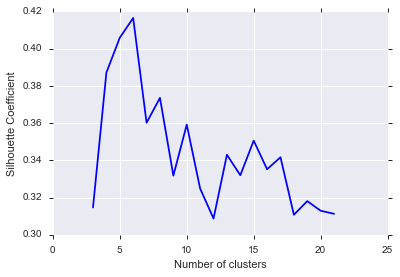

In [ ]:
# plot the results
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
from sklearn.cluster import KMeans

km_20=KMeans(n_clusters=20,random_state=123)
km_20.fit(reduced_cr_1)
km_20.labels_
pd.Series(km_20.labels_).value_counts()

4     63
1     45
2     33
19    29
6     29
0     17
14    16
12    15
15    11
18     9
13     8
3      8
11     6
10     4
16     4
9      4
5      2
8      1
7      1
17     1
dtype: int64

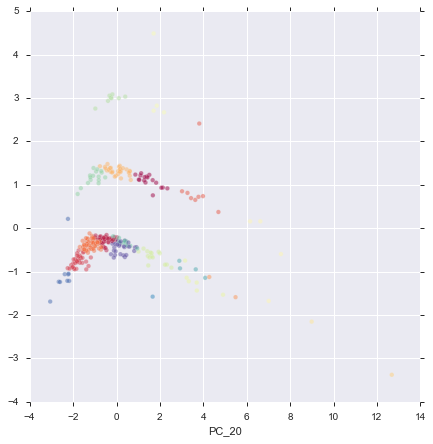

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr_1[:,0], reduced_cr_1[:,1], c=km_20.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_20')

In [ ]:
cluster_df_20=pd.concat([Medicare_Provider_data_group_region, pd.Series(km_20.labels_, name='Cluster_20')], axis=1)

In [ ]:
cluster_df_20.to_csv('cluster_df_20_1.csv')

##################################END The PART TWO#######################################

## Part 3: Identify 10000 medicate patient

In [ ]:
#Load Data
PatientHistorySamp = pd.read_csv("Patient_history_samp.csv")
ReviewPatientHistorySamp = pd.read_csv("Review_patient_history_samp.csv")
RreviewTransactionCoo = pd.read_csv("Rreview_transaction_coo.csv")
TransactionCoo = pd.read_csv("Transaction_coo.csv")

Data Analysis and Data Preparation

In [ ]:
#View Patient History Samp data Head
PatientHistorySamp.head(6)

,id,age,gender,income
0,306535165,65-74,F,24000-31999
1,742231134,65-74,F,48000+
2,928807201,75-84,M,24000-31999
3,83686538,<65,F,32000-47999
4,755607449,65-74,F,48000+
5,247750664,75-84,F,<16000


In [ ]:
PatientHistorySamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
id        500000 non-null int64
age       497470 non-null object
gender    500000 non-null object
income    497469 non-null object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [ ]:
#View Review Patient History Samp Data head
ReviewPatientHistorySamp.head(6)

,id,age,gender,income
0,381693273,65-74,F,24000-31999
1,444060924,65-74,M,24000-31999
2,3641691,65-74,F,24000-31999
3,672653795,65-74,M,48000+
4,144916176,<65,F,48000+
5,777168802,<65,F,32000-47999


In [ ]:
ReviewPatientHistorySamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
id        5000 non-null int64
age       4974 non-null object
gender    5000 non-null object
income    4974 non-null object
dtypes: int64(1), object(3)
memory usage: 156.3+ KB


In [ ]:
PatientHistorySamp.groupby('gender')['id'].nunique()

gender
F    274512
M    225488
Name: id, dtype: int64

In [ ]:
PatientHistorySamp.groupby('income')['id'].nunique()

income
16000-23999    102492
24000-31999     75670
32000-47999     95899
48000+         115865
<16000         107543
Name: id, dtype: int64

In [ ]:
PatientHistorySamp.groupby('age')['id'].nunique()

age
65-74    219329
75-84    128992
85+       64581
<65       84568
Name: id, dtype: int64

In [ ]:
#function to get the income group indicator
def incometype(patient):
    if (patient['income']  == '16000-23999'):
        return 2
    elif (patient['income']  == '24000-31999'):
        return 3
    elif (patient['income']  == '32000-47999'):
        return 4
    elif (patient['income']  == '48000+'):
        return 5
    else:
        return 1

In [ ]:
#function to get the age group indicator
def agetype(patient):
    if (patient['age']  == '65-74'):
        return 2
    elif (patient['age']  == '75-84'):
        return 3
    elif (patient['age']  == '85+'):
        return 4
    else:
        return 1

In [ ]:
#function to get the gender group indicator
def gendertype(patient):
    if (patient['gender']  == 'M'):
        return 1
    else:
        return 0

In [ ]:
PatientHistorySamp['INCOME_GROUP'] = PatientHistorySamp.apply(incometype, axis=1)

In [ ]:
PatientHistorySamp['AGE_GROUP'] = PatientHistorySamp.apply(agetype, axis=1)

In [ ]:
PatientHistorySamp['GENDER_GROUP'] = PatientHistorySamp.apply(gendertype, axis=1)

In [ ]:
ReviewPatientHistorySamp['INCOME_GROUP'] = ReviewPatientHistorySamp.apply(incometype, axis=1)

In [ ]:
ReviewPatientHistorySamp['AGE_GROUP'] = ReviewPatientHistorySamp.apply(agetype, axis=1)

In [ ]:
ReviewPatientHistorySamp['GENDER_GROUP'] = ReviewPatientHistorySamp.apply(gendertype, axis=1)

In [ ]:
PatientHistorySamp.drop(['age', 'gender', 'income'], axis =1 , inplace = True)

In [ ]:
ReviewPatientHistorySamp.drop(['age', 'gender', 'income'], axis =1 , inplace = True)

In [ ]:
col_dummies=pd.get_dummies(TransactionCoo['global_proc_id'], prefix='proc')
Transaction_cat = pd.concat([TransactionCoo, col_dummies], axis=1)
Transaction_cat.drop( 'global_proc_id', axis = 1, inplace = True )

In [ ]:
Transaction_grouped = pd.DataFrame(Transaction_cat[['id', 'count','proc_1' ,'proc_2' ,'proc_3' ,'proc_4' ,'proc_5' ,
'proc_6' ,'proc_7' ,'proc_8' ,'proc_9' ,'proc_10' ,'proc_11' , 'proc_12' ,'proc_13' ,'proc_14' ,'proc_15' ,'proc_16' ,'proc_17' ,
'proc_18' ,'proc_19' ,'proc_20' ,'proc_21' ,'proc_22' ,'proc_23' , 'proc_24' ,'proc_25' ,'proc_26' ,'proc_27' ,'proc_28' ,'proc_29' ,
'proc_30' ,'proc_31' ,'proc_32' ,'proc_33' ,'proc_34' ,'proc_35' ,'proc_36' ,'proc_37' ,'proc_38' ,'proc_39' ,'proc_40' ,'proc_41' ,
'proc_42' ,'proc_43' ,'proc_44' ,'proc_45' ,'proc_46' ,'proc_47' , 'proc_48' ,'proc_49' ,'proc_50' ,'proc_51' ,'proc_52' ,'proc_53' ,
'proc_54' ,'proc_55' ,'proc_56' ,'proc_57' ,'proc_58' ,'proc_59' , 'proc_60' ,'proc_61' ,'proc_62' ,'proc_63' ,'proc_64' ,'proc_65' ,
'proc_66' ,'proc_67' ,'proc_68' ,'proc_69' ,'proc_70' ,'proc_71' ,'proc_72' ,'proc_73' ,'proc_74' ,'proc_75' ,'proc_76' ,'proc_77' ,
'proc_78' ,'proc_79' ,'proc_80' ,'proc_81' ,'proc_82' ,'proc_83' ,'proc_84' ,'proc_85' ,'proc_86' ,'proc_87' ,'proc_88' ,'proc_89' ,
'proc_90' ,'proc_91' ,'proc_92' ,'proc_93' ,'proc_94' ,'proc_95' ,'proc_96' ,'proc_97' ,'proc_98' ,'proc_99' ,'proc_100' ,'proc_101' ,
'proc_102' ,'proc_103' ,'proc_104' ,'proc_105' ,'proc_106' ,'proc_107' ,'proc_108' ,'proc_109' ,'proc_110' ,'proc_111' ,
'proc_112' ,'proc_113' ,'proc_114' ,'proc_115' ,'proc_116' ,'proc_117' ,'proc_118' ,'proc_119' ,'proc_120' ,'proc_121' ,
'proc_122' ,'proc_123' ,'proc_124' ,'proc_125' ,'proc_126' ,'proc_127' ,'proc_128' ,'proc_129' ,'proc_130']].groupby(['id']).agg({'count':'sum',
'proc_1' :'sum' ,'proc_2' :'sum' , 'proc_3' :'sum' ,'proc_4' :'sum' , 'proc_5' :'sum' ,'proc_6' :'sum' , 'proc_7' :'sum' , 'proc_8' :'sum' ,
'proc_9' :'sum' , 'proc_10' :'sum' , 'proc_11' :'sum' ,'proc_12' :'sum' ,'proc_13' :'sum' , 'proc_14' :'sum' , 'proc_15' :'sum' ,'proc_16' :'sum' ,
'proc_17' :'sum' ,'proc_18' :'sum' ,'proc_19' :'sum' , 'proc_20' :'sum' ,'proc_21' :'sum' , 'proc_22' :'sum' , 'proc_23' :'sum' ,'proc_24' :'sum' ,
'proc_25' :'sum' , 'proc_26' :'sum' , 'proc_27' :'sum' ,'proc_28' :'sum' , 'proc_29' :'sum' ,'proc_30' :'sum' ,'proc_31' :'sum' ,'proc_32' :'sum' ,
'proc_33' :'sum' ,'proc_34' :'sum' ,'proc_35' :'sum' ,'proc_36' :'sum' ,'proc_37' :'sum' , 'proc_38' :'sum' , 'proc_39' :'sum' , 'proc_40' :'sum' ,
'proc_41' :'sum' ,'proc_42' :'sum' ,'proc_43' :'sum' ,'proc_44' :'sum' ,'proc_45' :'sum' , 'proc_46' :'sum' , 'proc_47' :'sum' , 'proc_48' :'sum' ,
'proc_49' :'sum' ,'proc_50' :'sum' , 'proc_51' :'sum' ,'proc_52' :'sum' ,'proc_53' :'sum' ,'proc_54' :'sum' , 'proc_55' :'sum' , 'proc_56' :'sum' ,
'proc_57' :'sum' ,'proc_58' :'sum' ,'proc_59' :'sum' ,'proc_60' :'sum' ,'proc_61' :'sum' , 'proc_62' :'sum' , 'proc_63' :'sum' , 'proc_64' :'sum' ,
'proc_65' :'sum' , 'proc_66' :'sum' , 'proc_67' :'sum' , 'proc_68' :'sum' ,'proc_69' :'sum' , 'proc_70' :'sum' ,'proc_71' :'sum' , 'proc_72' :'sum' ,
'proc_73' :'sum' , 'proc_74' :'sum' , 'proc_75' :'sum' ,'proc_76' :'sum' ,'proc_77' :'sum' ,'proc_78' :'sum' ,'proc_79' :'sum' , 'proc_80' :'sum' ,
'proc_81' :'sum' , 'proc_82' :'sum' , 'proc_83' :'sum' ,'proc_84' :'sum' ,'proc_85' :'sum' ,'proc_86' :'sum' ,'proc_87' :'sum' ,'proc_88' :'sum' ,
'proc_89' :'sum' ,'proc_90' :'sum' ,'proc_91' :'sum' ,'proc_92' :'sum' ,'proc_93' :'sum' , 'proc_94' :'sum' ,'proc_95' :'sum' , 'proc_96' :'sum' ,
'proc_97' :'sum' ,'proc_98' :'sum' ,'proc_99' :'sum' ,'proc_100' :'sum' ,'proc_101' :'sum' ,'proc_102' :'sum' ,'proc_103' :'sum' ,'proc_104' :'sum' ,
'proc_105' :'sum' ,'proc_106' :'sum' ,'proc_107' :'sum' ,'proc_108' :'sum' ,'proc_109' :'sum' ,'proc_110' :'sum' ,'proc_111' :'sum' ,'proc_112' :'sum' ,
'proc_113' :'sum' , 'proc_114' :'sum' , 'proc_115' :'sum' ,'proc_116' :'sum' , 'proc_117' :'sum' ,'proc_118' :'sum' ,'proc_119' :'sum' ,
'proc_120' :'sum' ,'proc_121' :'sum' ,'proc_122' :'sum' ,'proc_123' :'sum' , 'proc_124' :'sum' , 'proc_125' :'sum' ,'proc_126' :'sum' ,
'proc_127' :'sum' , 'proc_128' :'sum' ,'proc_129' :'sum' ,'proc_130' :'sum' }))

In [ ]:
Transaction_grouped.head()

,proc_57,proc_56,proc_19,proc_18,proc_53,proc_52,proc_51,proc_50,proc_13,proc_12,...,proc_35,proc_34,proc_37,proc_36,proc_31,proc_30,proc_33,proc_32,proc_39,proc_38
id,,,,,,,,,,,,,,,,,,,,,
7561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7619,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15213,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Transaction_grouped = Transaction_grouped.reset_index()

In [ ]:
full_dataset = Transaction_grouped.merge(PatientHistorySamp,on='id', how='left')

In [ ]:
col_dummies=pd.get_dummies(RreviewTransactionCoo['global_proc_id'], prefix='proc')
Review_transaction_cat = pd.concat([RreviewTransactionCoo, col_dummies], axis=1)
Review_transaction_cat.drop( 'global_proc_id', axis = 1, inplace = True )

In [ ]:
Review_transaction_grouped = pd.DataFrame(Review_transaction_cat[['id', 'count','proc_1' ,'proc_2' ,'proc_3' ,'proc_5' ,'proc_6' ,
'proc_7' ,'proc_8' ,'proc_9' ,'proc_10' ,'proc_11' ,'proc_12' ,'proc_13' ,'proc_14' ,'proc_15' ,'proc_16' ,'proc_17' ,
'proc_18' ,'proc_19' ,'proc_20' ,'proc_21' ,'proc_22' ,'proc_23' ,'proc_24' ,'proc_25' ,'proc_26' ,'proc_27' ,'proc_28' ,'proc_29' ,
'proc_30' ,'proc_31' ,'proc_32' ,'proc_33' ,'proc_34' ,'proc_35' ,'proc_36' ,'proc_37' ,'proc_38' ,'proc_39' ,'proc_40' ,'proc_41' ,
'proc_42' ,'proc_43' ,'proc_44' ,'proc_45' ,'proc_46' ,'proc_47' , 'proc_48' ,'proc_49' ,'proc_50' ,'proc_51' ,'proc_52' ,'proc_53' ,
'proc_54' ,'proc_55' ,'proc_56' ,'proc_57' ,'proc_58' ,'proc_59' , 'proc_60' ,'proc_61' ,'proc_62' ,'proc_63' ,'proc_64' ,'proc_65' ,
'proc_66' ,'proc_67' ,'proc_68' ,'proc_69' ,'proc_70' ,'proc_71' , 'proc_72' ,'proc_73' ,'proc_74' ,'proc_75' ,'proc_76' ,'proc_77' ,
'proc_78' ,'proc_79' ,'proc_80' ,'proc_81' ,'proc_82' ,'proc_83' ,'proc_84' ,'proc_85' ,'proc_86' ,'proc_87' ,'proc_88' ,'proc_89' ,
'proc_90' ,'proc_91' ,'proc_92' ,'proc_93' ,'proc_94' ,'proc_95' ,'proc_96' ,'proc_97' ,'proc_98' ,'proc_99' ,'proc_100' ,'proc_101' ,
'proc_102' ,'proc_103' ,'proc_104' ,'proc_105' ,'proc_106' ,'proc_107' ,'proc_108' ,'proc_109' ,'proc_110' ,'proc_111' ,
'proc_112' ,'proc_113' ,'proc_114' ,'proc_115' ,'proc_116' , 'proc_117' ,'proc_118' ,'proc_119' ,'proc_120' ,'proc_121' ,
'proc_122' ,'proc_123' ,'proc_124' ,'proc_125' ,'proc_126' , 'proc_127' ,'proc_128' ,'proc_129' ,'proc_130']].groupby(['id']).agg({'count':'sum',
'proc_1' :'sum' ,'proc_2' :'sum' ,'proc_3' :'sum' ,'proc_5' :'sum' ,'proc_6' :'sum' , 'proc_7' :'sum' ,'proc_8' :'sum' ,'proc_9' :'sum' ,
'proc_10' :'sum' ,'proc_11' :'sum' ,'proc_12' :'sum' ,'proc_13' :'sum' ,'proc_14' :'sum' ,'proc_15' :'sum' ,'proc_16' :'sum' ,'proc_17' :'sum' ,
'proc_18' :'sum' ,'proc_19' :'sum' , 'proc_20' :'sum' , 'proc_21' :'sum' ,'proc_22' :'sum' , 'proc_23' :'sum' , 'proc_24' :'sum' , 'proc_25' :'sum' ,
'proc_26' :'sum' ,'proc_27' :'sum' ,'proc_28' :'sum' ,'proc_29' :'sum' ,'proc_30' :'sum' ,'proc_31' :'sum' , 'proc_32' :'sum' , 'proc_33' :'sum' ,
'proc_34' :'sum' ,'proc_35' :'sum' , 'proc_36' :'sum' ,'proc_37' :'sum' ,'proc_38' :'sum' , 'proc_39' :'sum' , 'proc_40' :'sum' ,'proc_41' :'sum' ,
'proc_42' :'sum' , 'proc_43' :'sum' , 'proc_44' :'sum' ,'proc_45' :'sum' ,'proc_46' :'sum' , 'proc_47' :'sum' , 'proc_48' :'sum' , 'proc_49' :'sum' ,
'proc_50' :'sum' ,'proc_51' :'sum' ,'proc_52' :'sum' ,'proc_53' :'sum' , 'proc_54' :'sum' ,'proc_55' :'sum' , 'proc_56' :'sum' ,'proc_57' :'sum' ,
'proc_58' :'sum' ,'proc_59' :'sum' ,'proc_60' :'sum' ,'proc_61' :'sum' ,'proc_62' :'sum' , 'proc_63' :'sum' ,'proc_64' :'sum' ,'proc_65' :'sum' ,
'proc_66' :'sum' , 'proc_67' :'sum' ,'proc_68' :'sum' ,'proc_69' :'sum' , 'proc_70' :'sum' ,'proc_71' :'sum' ,'proc_72' :'sum' , 'proc_73' :'sum' ,
'proc_74' :'sum' , 'proc_75' :'sum' , 'proc_76' :'sum' ,'proc_77' :'sum' ,'proc_78' :'sum' , 'proc_79' :'sum', 'proc_80' :'sum' ,'proc_81' :'sum' ,
'proc_82' :'sum' , 'proc_83' :'sum' ,'proc_84' :'sum' ,'proc_85' :'sum' ,'proc_86' :'sum' , 'proc_87' :'sum' ,'proc_88' :'sum' ,'proc_89' :'sum' ,
'proc_90' :'sum' , 'proc_91' :'sum' ,'proc_92' :'sum' , 'proc_93' :'sum' ,'proc_94' :'sum' , 'proc_95' :'sum' ,'proc_96' :'sum' , 'proc_97' :'sum' ,
'proc_98' :'sum' , 'proc_99' :'sum' , 'proc_100' :'sum' , 'proc_101' :'sum' , 'proc_102' :'sum' , 'proc_103' :'sum' , 'proc_104' :'sum' ,
'proc_105' :'sum' ,'proc_106' :'sum' ,'proc_107' :'sum' , 'proc_108' :'sum' ,'proc_109' :'sum' ,'proc_110' :'sum' ,'proc_111' :'sum' ,
'proc_112' :'sum' , 'proc_113' :'sum' , 'proc_114' :'sum' , 'proc_115' :'sum' , 'proc_116' :'sum' , 'proc_117' :'sum' ,'proc_118' :'sum' ,
'proc_119' :'sum' ,'proc_120' :'sum' ,'proc_121' :'sum' , 'proc_122' :'sum' ,'proc_123' :'sum' , 'proc_124' :'sum' , 'proc_125' :'sum' ,
'proc_126' :'sum' , 'proc_127' :'sum' , 'proc_128' :'sum' , 'proc_129' :'sum' ,'proc_130' :'sum' }))

In [ ]:
Review_transaction_grouped = Review_transaction_grouped.reset_index()

In [ ]:
# Review dataset do not have patient opting for proc 4 - hence creating a dummy column with all zeros
Review_transaction_grouped['proc_4'] = 0

In [ ]:
review_dataset = Review_transaction_grouped.merge(ReviewPatientHistorySamp,on='id', how='left')

In [ ]:
full_dataset['REVIEW_IND'] = 0

In [ ]:
review_dataset['REVIEW_IND'] = 1

In [ ]:
list1 = (full_dataset.filter(like='proc').columns)

In [ ]:
full_dataset[list1] = full_dataset[list1].astype('int64')
review_dataset[list1] = full_dataset[list1].astype('int64')

In [ ]:
# Dropping columns having null values
full_dataset.dropna(axis=0, how='any', inplace = True)

In [ ]:
full_dataset[['INCOME_GROUP', 'AGE_GROUP', 'GENDER_GROUP']] = full_dataset[['INCOME_GROUP', 'AGE_GROUP', 'GENDER_GROUP']].astype('int64')

In [ ]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 504999
Columns: 136 entries, id to REVIEW_IND
dtypes: int64(136)
memory usage: 522.6 MB


In [ ]:
review_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 136 entries, id to REVIEW_IND
dtypes: int64(136)
memory usage: 5.2 MB


In [ ]:
full_dataset['id'].count()

500000

In [ ]:
review_dataset['id'].count()

5000

In [ ]:
sample_dataset = full_dataset.sample(frac=0.1)

In [ ]:
frames = [sample_dataset, review_dataset]
train_df = pd.concat(frames)

In [ ]:
cols = train_df.columns.difference( ['REVIEW_IND', 'id'] )

In [ ]:
df_train = train_df[cols ]
df_test = full_dataset[cols ]

In [ ]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( train_df[cols ],
                                                  train_df['REVIEW_IND'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123, ratio = 0.5)
x_train_res, y_train_res = sm.fit_sample(train_X,  train_y)

C:\Users\mahmud\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_test  = full_dataset.copy()

In [ ]:
df_test[cols].head()

,AGE_GROUP,GENDER_GROUP,INCOME_GROUP,count,proc_1,proc_10,proc_100,proc_101,proc_102,proc_103,...,proc_90,proc_91,proc_92,proc_93,proc_94,proc_95,proc_96,proc_97,proc_98,proc_99
0,2,1,5,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,5,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,4,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:

clf = RandomForestClassifier(n_estimators=50 )
clf.fit(x_train_res, y_train_res)

# Make predictions for train and test dataset
predictions_train = clf.predict(x_train_res)
probs_train = clf.predict_proba(x_train_res)
predictions = clf.predict(df_test[cols])
probs = clf.predict_proba(df_test[cols])
#display(predictions)

In [ ]:
score = clf.score(x_train_res, y_train_res)
print("Accuracy: ", score)

('Accuracy: ', 0.99391859244572556)


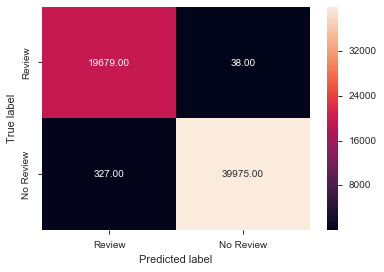

In [ ]:
tree_cm = metrics.confusion_matrix( predictions_train,
                                 y_train_res, [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Review", "No Review"] , yticklabels = ["Review", "No Review"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#Predicting the test cases
predictions_train_df = pd.DataFrame( { 'actual':  y_train_res,
                            'predicted': predictions_train } )

In [ ]:
probs_train_df = pd.DataFrame(probs_train)

In [ ]:
train_pred = pd.concat( [predictions_train_df, probs_train_df], axis = 1 )

In [ ]:
train_pred.columns = ['actual', 'predicted', 'Review_0', 'Review_1']

In [ ]:
train_pred.head(10)

,actual,predicted,Review_0,Review_1
0,0,0,1.000000,0.000000
1,0,0,0.958333,0.041667
2,1,1,0.320000,0.680000
3,0,0,1.000000,0.000000
4,0,0,0.980000,0.020000
5,1,1,0.420000,0.580000
6,0,0,0.980000,0.020000
7,0,0,1.000000,0.000000
8,0,0,1.000000,0.000000
9,1,0,0.508619,0.491381


In [ ]:
#Score for test Datasets
score = clf.score(df_test[cols], df_test["REVIEW_IND"])
print("Accuracy: ", score)

('Accuracy: ', 0.96727399999999997)


In [ ]:
df_test["prob_true"] = probs[:, 1]

In [ ]:
df_anomalous= df_test[df_test["prob_true"] > 0.5 ]
df_anomalous["prob_true"].count()

16363

In [ ]:
df_anomalous.head()

,id,proc_57,proc_56,proc_19,proc_18,proc_53,proc_52,proc_51,proc_50,proc_13,...,proc_30,proc_33,proc_32,proc_39,proc_38,INCOME_GROUP,AGE_GROUP,GENDER_GROUP,REVIEW_IND,prob_true
21,37033,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,1,0,0,0.58
23,39897,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,1,0,0.62
30,47601,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,0,0.82
54,115182,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,3,0,0,0.52
63,126180,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,0.62


In [ ]:
df_id_review = df_anomalous['id']

In [ ]:
indices = np.argsort(clf.feature_importances_)[::-1]

In [ ]:
#Using Recursive feature elmination
#The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

from sklearn.feature_selection import RFE

import itertools

rfc = RandomForestClassifier()

# create the RFE model and select 20 attributes
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(x_train_res, y_train_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.izip_longest(rfe.get_support(), cols)]
selected_features = [v for i, v in feature_map if i==True]

In [ ]:
# Selecting top 20 features for clustering
selected_features

['AGE_GROUP',
 'GENDER_GROUP',
 'INCOME_GROUP',
 'count',
 'proc_11',
 'proc_124',
 'proc_13',
 'proc_14',
 'proc_17',
 'proc_19',
 'proc_2',
 'proc_20',
 'proc_22',
 'proc_25',
 'proc_26',
 'proc_27',
 'proc_28',
 'proc_3',
 'proc_34',
 'proc_99']

In [ ]:
df_subdata = df_anomalous.drop('prob_true', axis =1)

In [ ]:
frames = [df_subdata, review_dataset]
medi_data = pd.concat(frames)

In [ ]:
medi_data.head()

,AGE_GROUP,GENDER_GROUP,INCOME_GROUP,REVIEW_IND,count,id,proc_1,proc_10,proc_100,proc_101,...,proc_90,proc_91,proc_92,proc_93,proc_94,proc_95,proc_96,proc_97,proc_98,proc_99
21,1,0,5,0,5,37033,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,2,1,2,0,4,39897,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,4,0,1,0,2,47601,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,3,0,4,0,3,115182,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
63,2,0,2,0,4,126180,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
analysis_data = medi_data[selected_features]

In [ ]:
col_list = analysis_data.columns

In [ ]:
col_list

Index([u'AGE_GROUP', u'GENDER_GROUP', u'INCOME_GROUP', u'count', u'proc_11',
       u'proc_124', u'proc_13', u'proc_14', u'proc_17', u'proc_19', u'proc_2',
       u'proc_20', u'proc_22', u'proc_25', u'proc_26', u'proc_27', u'proc_28',
       u'proc_3', u'proc_34', u'proc_99'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
analysis_scaled=sc.fit_transform(analysis_data)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
var_ratio={}
for n in range(2,20):
    pc = PCA(n_components=n)
    analysis_pca=pc.fit(analysis_scaled)
    var_ratio[n]=sum(analysis_pca.explained_variance_ratio_)

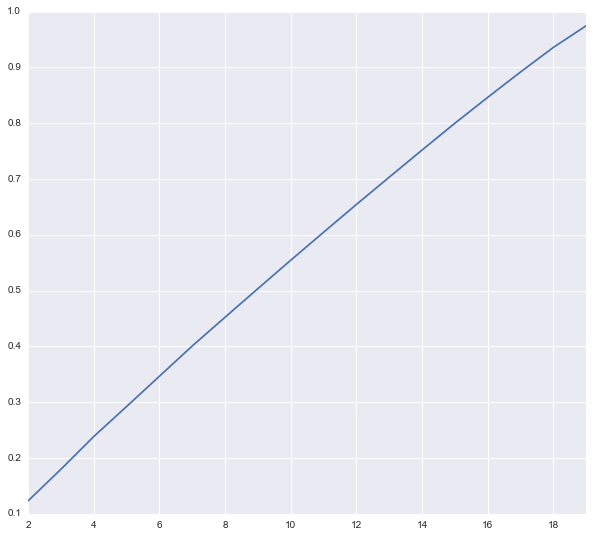

In [ ]:
sns.set(rc={'figure.figsize':(10,9)})
pd.Series(var_ratio).plot()

In [ ]:
var_ratio

{2: 0.12338326850930423,
 3: 0.17999690277552133,
 4: 0.2386297435406351,
 5: 0.29238919840655569,
 6: 0.3466494115587947,
 7: 0.40087736782954836,
 8: 0.45238014682334826,
 9: 0.50369458450448257,
 10: 0.55449327570445717,
 11: 0.60465030242401341,
 12: 0.65443100929297304,
 13: 0.70330629527374122,
 14: 0.75192220444658608,
 15: 0.79995834037679436,
 16: 0.84632884030420519,
 17: 0.89180965231185316,
 18: 0.93584881626265082,
 19: 0.97467719413925102}

In [ ]:
# 16 component is defining 84% of variability
pc_final=PCA(n_components=16).fit(analysis_scaled)
reduced_cr=pc_final.fit_transform(analysis_scaled)

In [ ]:
reduced_cr.shape

(21363L, 16L)

In [ ]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' + str(i) for i in range(16)], index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15
AGE_GROUP,0.351426,-0.267691,0.268688,-0.052879,-0.456701,0.012791,0.022075,-0.100306,0.138900,0.049018,-0.078326,-0.173431,0.009525,0.233572,0.119813,-0.102132
GENDER_GROUP,0.336001,-0.036186,0.051458,0.358396,-0.181534,0.296859,-0.300142,-0.012687,0.026173,0.021661,0.019737,0.033510,-0.104460,0.188694,0.035767,-0.219134
INCOME_GROUP,-0.400260,0.285187,-0.261706,0.360201,-0.088720,0.116511,-0.027908,0.044095,0.043313,-0.043166,0.051583,0.071727,-0.026730,-0.183031,0.013146,-0.041875
count,0.440117,0.382115,-0.374746,-0.159531,-0.011895,0.272769,0.132897,0.073428,0.056924,-0.030309,0.114089,-0.067634,-0.147899,-0.158163,0.214732,-0.018697
proc_11,0.005287,-0.078838,0.009575,-0.098007,0.295999,0.219773,0.013482,0.257142,0.450760,-0.080317,-0.114815,-0.059758,0.625716,-0.027294,0.304942,-0.203771
proc_124,0.145448,-0.109740,0.173460,0.167303,-0.163147,-0.092548,-0.055249,0.115895,-0.098742,0.049136,-0.008999,0.654727,0.107487,-0.447232,0.354748,0.103728
proc_13,0.071438,0.034115,-0.074363,0.104148,0.107281,0.416837,-0.016971,0.349040,-0.211639,0.324825,-0.124225,0.285958,0.162247,0.408645,-0.322882,0.245506
proc_14,-0.167710,-0.032854,0.047277,0.045286,-0.041932,0.059957,-0.043274,0.273844,-0.461047,-0.309614,0.390058,-0.106323,-0.021540,0.324233,0.514732,-0.015097
proc_17,0.215464,-0.300067,-0.047595,0.210603,0.414424,0.143142,0.059597,-0.013390,-0.031695,-0.430309,0.018259,-0.215354,-0.105595,-0.109673,-0.062256,0.306571
proc_19,0.091717,-0.042561,0.267277,-0.217488,0.448569,0.272790,-0.018042,-0.066646,-0.033962,0.329432,0.138823,0.082786,-0.449157,-0.182264,0.143969,-0.143636


In [ ]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_' + str(i) for i in range(16)])

PC_0     0.066126
PC_1     0.058919
PC_2     0.058641
PC_3     0.056691
PC_4     0.054390
PC_5     0.053685
PC_6     0.053040
PC_7     0.051563
PC_8     0.050939
PC_9     0.050498
PC_10    0.050157
PC_11    0.049781
PC_12    0.048875
PC_13    0.048616
PC_14    0.048036
PC_15    0.046370
dtype: float64

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [ ]:
# calculate SC for K=3 through K=15
#k_range = range(3, 15)
#scores = []

In [ ]:
#for k in k_range:
#    km = KMeans(n_clusters=k, random_state=1)
#    km.fit(analysis_scaled)
#    scores.append(metrics.silhouette_score(analysis_scaled, km.labels_))

In [ ]:
scores

[0.31469461595992654,
 0.3872393086154885,
 0.4059540045327712,
 0.41658342481589783,
 0.36023564426745114,
 0.37360785183968082,
 0.33181860209848074,
 0.35922684225522306,
 0.32486144020671803,
 0.30874692258484987,
 0.34302864297751723,
 0.33202535615521594,
 0.35062408446566784,
 0.33524894444045589,
 0.34169014758793742,
 0.310772771544994,
 0.31811207837995981,
 0.31293552371993688,
 0.31127906990287796]

In [ ]:
# plot the results
#plt.plot(k_range, scores)
#plt.xlabel('Number of clusters')
#plt.ylabel('Silhouette Coefficient')
#plt.grid(True)

In [ ]:
cluster_range = range( 1, 15 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( analysis_scaled )
    cluster_errors.append( clusters.inertia_ )

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,cluster_errors,num_clusters
0,427260.000000,1
1,404542.753539,2
2,383259.401303,3
3,362747.916739,4
4,342223.268665,5
5,322760.531436,6
6,303644.986876,7
7,287173.736411,8
8,264878.653486,9
9,249212.995338,10


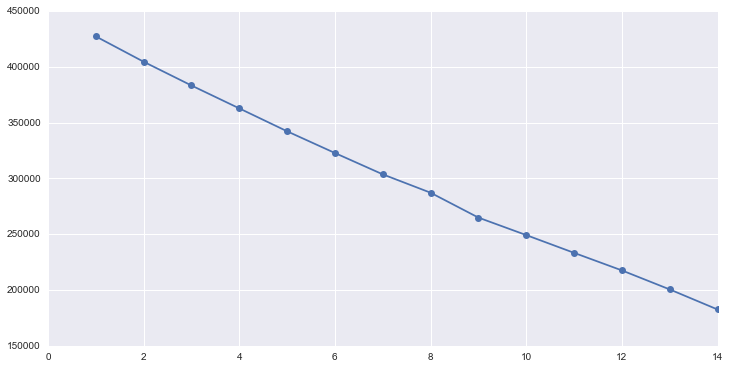

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
km_5=KMeans(init='k-means++', n_clusters=5,random_state=123)

In [ ]:
km_5.fit(reduced_cr)
km_5.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
pd.Series(km_5.labels_).value_counts()

1    13289
2     5484
4     1652
3      475
0      463
dtype: int64

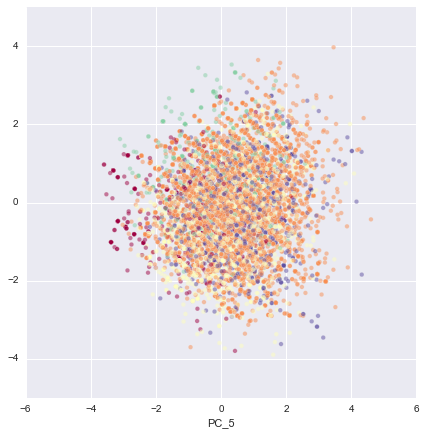

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_5')

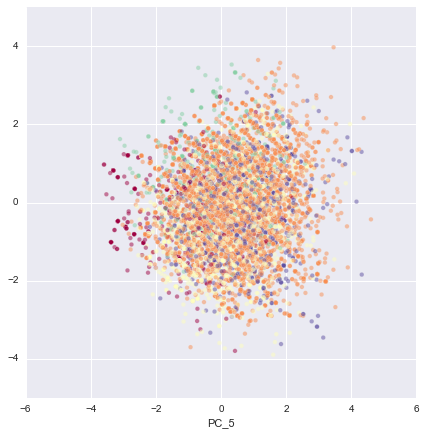

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_5')

In [ ]:
km_5 = pd.DataFrame(km_5.labels_)

In [ ]:
km_5.count()

0    21363
dtype: int64

In [ ]:
medi_data = medi_data.reset_index()

In [ ]:
cluster_df_5= pd.concat([medi_data, km_5], axis=1)

In [ ]:
cluster_df_5.rename(columns={0: 'KMEANS_5'}, inplace=True)

In [ ]:
cluster_df_5.to_csv('cluster_df_5.csv')

In [ ]:
cluster_df_5.head()

,index,AGE_GROUP,GENDER_GROUP,INCOME_GROUP,REVIEW_IND,count,id,proc_1,proc_10,proc_100,...,proc_91,proc_92,proc_93,proc_94,proc_95,proc_96,proc_97,proc_98,proc_99,KMEANS_5
0,21,1,0,5,0,5,37033,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,23,2,1,2,0,4,39897,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,30,4,0,1,0,2,47601,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,54,3,0,4,0,3,115182,0,0,0,...,1,0,0,0,0,0,0,0,0,2
4,63,2,0,2,0,4,126180,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
cluster_to_audit = cluster_df_5[['id', 'REVIEW_IND', 'KMEANS_5']]

In [ ]:
cluster_to_audit

,id,REVIEW_IND,KMEANS_5
0,37033,0,1
1,39897,0,1
2,47601,0,1
3,115182,0,2
4,126180,0,4
5,266067,0,1
6,283176,0,1
7,355410,0,1
8,374715,0,1
9,380626,0,1
